# <img src="https://faculty.washington.edu/pmacc/LO/Figs/splash.png" align="right">

# Intro to Live Ocean Virtual Mooring Data
This script is intended to give you a starting point to loading and plotting model predictions by UW's Live Ocean model. Parker MacCready has kindly shared 2-years of model predictions at several virtual mooring locations. Though the model is 3-D, it is often much easier to examine data in 1 or 2-dimensions, and in this class, you are not expected to peform complex analysis on 3-D, or greater dimensioned datasets

Live Ocean is a ROMS circulation model (https://www.myroms.org/) developed and maintained by University of Washington

Take a look at the model description on https://faculty.washington.edu/pmacc/LO/LiveOcean.html and in Sutherland 2011 et al

All the model predictions are in our shared Google Drive <br>
<i>ESCI491/LiveOceanModelPredictions/</i>

You can see the locations by opening the kml in Google Earth
<i>ROMS_VirtualBuoys.kml</i>

If you don't have access to Google Earth you can open it in Caltopo, https://caltopo.com/map.html . Just go to Import -> Choose Files -> Choose the kml you downloaded from Google Drive


In [1]:
# First we import the packages we want to use, note we must install netcdf4
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import os
!pip install netcdf4

     |████████████████████████████████| 4.1MB 3.5MB/s 
     |████████████████████████████████| 327kB 23.1MB/s 


In [2]:
# As usual, Connect to your drive, follow the instructions
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Then of course navigate to your script.
# NOTE! This will be different for you. 
# Please modify to navigate to your Google Drive folder with you script
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/ESCI491')

 ## Activity: Exchange flow
Here you will examine modeled currents, filter out the tidal fluxes and estimate the exchange flow, and then see if you can identify an pattern of exchange flow strength with Spring and Neap tidal cycles. Here you will

* Load model data
* Average velocities in time
* Compare to tidal water levels to observe differences in Neap and Spring tides
* Compare with salinity profiles to determine the influence of 
stratification.
* Examine the impacts of Neap and Spring tides on NO3 and plankton concentrations
* Perform a similar analysis at Hood Canal South Site

Below, the initial analysis is started, fill in where directions indicate.

In [0]:
# Loading and pre-processing model predictions from south Admiratly Inlet

fname = 'LiveOceanModelPredictions/admiraltySouth_hourly.nc'
# Nowe use xarray to open the netcdf dataset
ds = xr.open_dataset(fname)

# We are going to transpose two variables so that plots show time on x-axis
ds = ds.transpose('s_rho', 'ocean_time', 's_w', 'scalar')

# We will also set the s_rho dimension, which is the model layer, to the mean depth.
#  this will make it more intuitive we examine the modeled variables
ds['s_rho']=ds['z_rho'].mean(dim='ocean_time')
ds['s_rho'].attrs = {'long_name': 'Elevation', 'units': 'm'}

In [0]:
# To average out the tides we will use a filter defined below
# The details are not important, but just know this will remove the high frequency tidal motions, leaving residual flow
# Below we define a function to do the filtering
import numpy as np
from scipy.signal import butter,filtfilt
def butter_lowpass_filter(data, cutoff, fs, order):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

In [0]:
# We will filter each model depth layer in a loop and construct a new fitlered variable, v_f
v_f = np.zeros(ds['u'].data.shape)
for i in range(ds['s_rho'].data.size):
  v_f[i,:] = butter_lowpass_filter(ds['v'].isel(s_rho=i).data,1/80,1,2)

ds['v_f'] = (['s_rho','ocean_time'],v_f) #New filtered variable
ds['v_f'].attrs = {'long_name': 'Residual Velocity', 'units': 'm/s'}

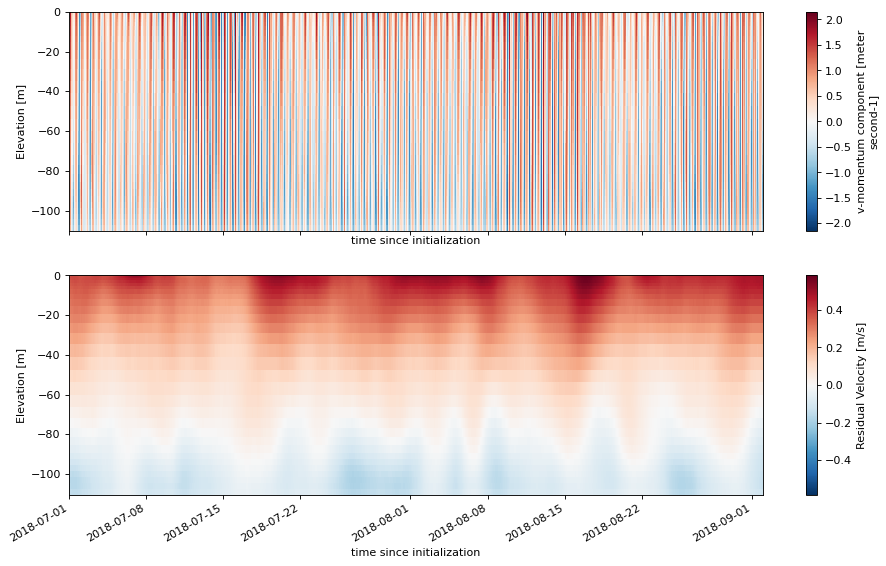

In [18]:
# In summer-time tides will have a larger influence, so plotting summer below.
# Note, red is velocity northward, blue is velocity southward
sdate = '2018-07-01'
edate = '2018-09-01'
v_f_sum = ds['v_f'].sel(ocean_time=slice(sdate,edate))
zeta_sum = ds['zeta'].sel(ocean_time=slice(sdate,edate))

f = plt.figure(num=None, figsize=(14,8), dpi=80, facecolor='w', edgecolor='k')
(ax1, ax2) = f.subplots(2, 1, sharex=True)
plt.sca(ax1)
ds['v'].plot()
plt.sca(ax2)
v_f_sum.plot()

### Step 1

Below, add code below to add zeta in the second panel. zeta is the free-surface, which is the tidal water level. zeta is a variable in your ds dataset. Note the addition of add_colorbar=False to the plotting command. Without this addition the x-axes won't line up.

(2pts)

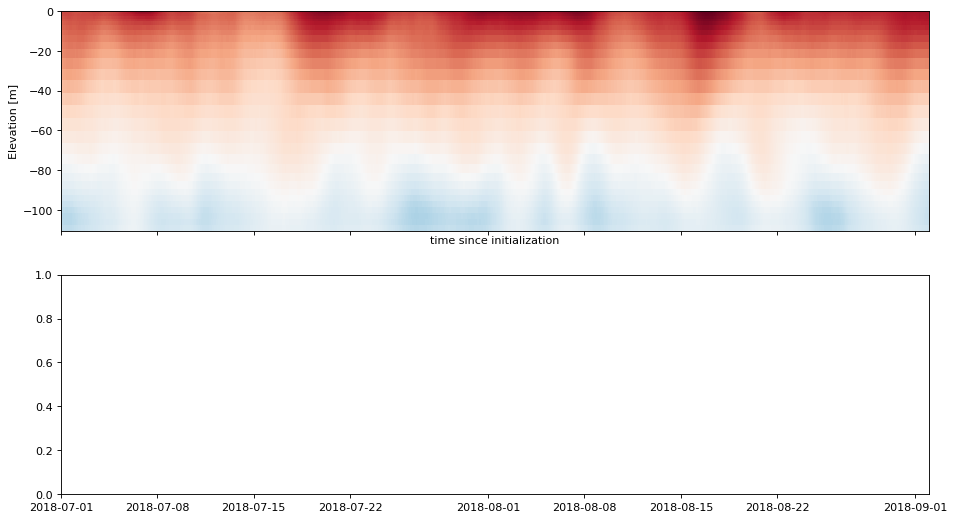

In [21]:
f = plt.figure(num=None, figsize=(14,8), dpi=80, facecolor='w', edgecolor='k')
(ax1, ax2) = f.subplots(2, 1, sharex=True)
plt.sca(ax1)
v_f_sum.plot(add_colorbar=False) # Note, removes colorbar to axes line up
plt.sca(ax2)
# your code here



### Step 2

Below write code to make a 2-panel plot of residual velocity (v_f) and salinity (salt). Remember to use add_colorbar=False. Is there a relation between stratification and residual exchange flow?

(6pts)

In [0]:
# Notes, use the above code as a guide



### Step 3

Make a 3-panel plot of tidal fluctuations (zeta), nitrate (NO3), and phytoplankton during the summer (July-August, as above). How do the Spring-Neap tidal cycles impact nitrate distributions and phytoplankton.

(6pts)

### Step 4

Examine the relationship between stratification, tidal fluctuations, and exchange flow at Hood Canal South. Make a 3-panel plot of residual velocity, salinity, and tidal fluctuations. How does the relationship between exchange velocity (v_f) and tidal fluctuations (zeta) compare between Admirately Inlet and Hood Canal? What differences or similarities do you see between two sites in relation to salinity structure and NO3 concentrations

(6pts)

### An aside
Note that we are using the 'v' velocity, or the northward velocity. In both these cases the estuary is orientated predominantly towards the north, however in general, for such an analysis you need to first rotate into the principle flow direction using PCA. For our purproses, 'v', is sufficient